## Boubacar Fakoly Doumbia, Master 2 Data Science, UIE (Commencé le 12/10/2021)

# Projet Crédit Scoring #

## Table des matières ##
### 1. Introduction ###
* Infos sur le dataset 
* Objectifs du projet
### 2. Importations ###
* Importation des librairies 
* Importation des données 
### 3. Nettoyage et connaissance des données ###
* Aperçu des données
* Voir les types de données
* Recherche des valeurs nulles ou manquantes
* Recherche des ocurences uniques
* Statistique simple sur les données
### 4. Analyse univariée des variables
* Affichage graphique de quelques informations descriptives
### 5. Analyse bivariée des variables
* Affichage graphique de quelques informations descriptives
### 6. Etude de la correlation entre les variables
### 7. Pré-traitement des données
* Importation des bibliothèques 
* Reglage des variables indépendantes X et la variable dépendantes Y
* Diviser les X et Y en données d'entrainnement et de test
### 8. Ré-échantillonnage des données déséquilibrées
* Utilisation de la librairie SMOTE pour échantilonnager le dataset (sur-échantillonnage et sous échantillonnage)
### 9. Modélisation
* Model 1 choisi: Score et Croos Validation
* Model 2 choisi: Score, Cross Validation



### 1. Introduction ###
### Context ###
#### Il s’agit ici d’une base de données associée à des crédits à la consommation (donc d’un montant peu élevé). ####
### Variables ###
* revenu (mensuel) : en euros
* depnais: département de naissance
* datenaiss : date de naissance
* durée du crédit : en mois
* montcred: en euros
* situfam : (0-célibataire et,1- en couple)
* ancienneté : en année
* cb : (0-pas de carte bancaire et, 1-posession d'une carte)
* numero: numéro de client dans la banque
* incident : critère à modéliser (0-absence d’incident, 1- incident)
### Objectif ###
#### C'est de rechercher le meilleur score, de justifier pourquoi il s’agit effectivement du meilleur et d’expliquer son intérêt et son utilisation pratique pour une banque, tout en sachant que le critère à modéliser est la variable incident de paiement. ####

### 2. Importations ###

In [1]:
#Importation des bibliothèques
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py 
py.init_notebook_mode(connected=True) # Autorise de travailler en offline
import plotly.graph_objs as go # Comme plt de matplot
import plotly.tools as tls # réuperer quelques outils
from collections import Counter # Faire un compteur pour certaines fonctionalités
import numpy as np
import warnings
warnings.filterwarnings('ignore') #masquer les warnings

In [2]:
#Importation des données
df=pd.read_csv("scoring.csv", sep=";") 

### 3. Nettoyage et connaissance des données ###

In [3]:
#Aperçu des données
df

,revenu,depnaiss,datenaiss,duree,montcred,situfam,ancienn,cb,numero,incident
0,"846,2234973",1.0,1916.0,17.0,846.0,0.0,55.0,0.0,1.0,0.0
1,"628,2761617",1.0,1919.0,12.0,1256.0,0.0,51.0,1.0,2.0,0.0
2,"3302,20604",1.0,1920.0,8.0,6604.0,1.0,50.0,1.0,3.0,0.0
3,"934,9534777",1.0,1923.0,10.0,934.0,0.0,57.0,0.0,4.0,0.0
4,"955,1546742",1.0,1929.0,11.0,955.0,0.0,55.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4141,"831,8391752",94.0,1978.0,6.0,831.0,0.0,1.0,0.0,4142.0,0.0
4142,"488,9502",94.0,1982.0,14.0,488.0,0.0,1.0,0.0,4143.0,0.0
4143,"423,1476848",94.0,1984.0,12.0,423.0,0.0,1.0,0.0,4144.0,0.0
4144,"1656,799979",94.0,1984.0,17.0,1656.0,1.0,1.0,1.0,4145.0,0.0


### Nous avons 4146 lignes et 10 variables existantes dans le dataset ###

In [4]:
#Types de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4146 entries, 0 to 4145
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   revenu     4145 non-null   object 
 1   depnaiss   4145 non-null   float64
 2   datenaiss  4145 non-null   float64
 3   duree      4145 non-null   float64
 4   montcred   4145 non-null   float64
 5   situfam    4145 non-null   float64
 6   ancienn    4145 non-null   float64
 7   cb         4145 non-null   float64
 8   numero     4145 non-null   float64
 9   incident   4145 non-null   float64
dtypes: float64(9), object(1)
memory usage: 324.0+ KB


### A part la variable revenu toutes les autres sont type réel flottant ###
### Nous allons changer la variable en réel flottant aussi ###

In [6]:
df['revenu'] = [str(x).replace(',', '.') for x in df['revenu']]
df['revenu'] = df['revenu'].astype(float)
print(df.info())                             
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4146 entries, 0 to 4145
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   revenu     4145 non-null   float64
 1   depnaiss   4145 non-null   float64
 2   datenaiss  4145 non-null   float64
 3   duree      4145 non-null   float64
 4   montcred   4145 non-null   float64
 5   situfam    4145 non-null   float64
 6   ancienn    4145 non-null   float64
 7   cb         4145 non-null   float64
 8   numero     4145 non-null   float64
 9   incident   4145 non-null   float64
dtypes: float64(10)
memory usage: 324.0 KB
None
           revenu  depnaiss  datenaiss  duree  montcred  situfam  ancienn  \
0      846.223497       1.0     1916.0   17.0     846.0      0.0     55.0   
1      628.276162       1.0     1919.0   12.0    1256.0      0.0     51.0   
2     3302.206040       1.0     1920.0    8.0    6604.0      1.0     50.0   
3      934.953478       1.0     1923.0   10.0     934.0  

In [5]:
df.describe()

,depnaiss,datenaiss,duree,montcred,situfam,ancienn,cb,numero,incident
count,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000
mean,47.024849,1949.457177,11.986972,2714.753438,0.443667,28.864897,0.666345,2073.000000,0.153438
std,27.357724,21.667963,3.714578,2655.676210,0.496876,21.010789,0.471575,1196.702762,0.360453
min,1.000000,1912.000000,6.000000,400.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,23.000000,1930.000000,9.000000,1035.000000,0.000000,9.000000,0.000000,1037.000000,0.000000
50%,47.000000,1950.000000,12.000000,1789.000000,0.000000,28.000000,1.000000,2073.000000,0.000000
75%,71.000000,1968.000000,15.000000,3368.000000,1.000000,47.000000,1.000000,3109.000000,0.000000
max,94.000000,1986.000000,18.000000,19438.000000,1.000000,73.000000,1.000000,4145.000000,1.000000


In [7]:
#Recherche des valeurs nulles
df.isnull().sum()

revenu       1
depnaiss     1
datenaiss    1
duree        1
montcred     1
situfam      1
ancienn      1
cb           1
numero       1
incident     1
dtype: int64

In [8]:
df[df.isna().any(axis=1)]

,revenu,depnaiss,datenaiss,duree,montcred,situfam,ancienn,cb,numero,incident
4145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Nous avons une ligne vide de contenu, on peut l'enlever du dataset ###

In [9]:
#On supprime les valeurs nulls
df = df.dropna(how='any',axis=0) 
df

,revenu,depnaiss,datenaiss,duree,montcred,situfam,ancienn,cb,numero,incident
0,846.223497,1.0,1916.0,17.0,846.0,0.0,55.0,0.0,1.0,0.0
1,628.276162,1.0,1919.0,12.0,1256.0,0.0,51.0,1.0,2.0,0.0
2,3302.206040,1.0,1920.0,8.0,6604.0,1.0,50.0,1.0,3.0,0.0
3,934.953478,1.0,1923.0,10.0,934.0,0.0,57.0,0.0,4.0,0.0
4,955.154674,1.0,1929.0,11.0,955.0,0.0,55.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4140,1083.529362,94.0,1978.0,14.0,1083.0,0.0,1.0,0.0,4141.0,0.0
4141,831.839175,94.0,1978.0,6.0,831.0,0.0,1.0,0.0,4142.0,0.0
4142,488.950200,94.0,1982.0,14.0,488.0,0.0,1.0,0.0,4143.0,0.0
4143,423.147685,94.0,1984.0,12.0,423.0,0.0,1.0,0.0,4144.0,0.0


In [10]:
df[df.isna().any(axis=1)]

,revenu,depnaiss,datenaiss,duree,montcred,situfam,ancienn,cb,numero,incident


In [11]:
#Nombres d'ocurences uniques des variables
df.nunique()

revenu       4145
depnaiss       94
datenaiss      75
duree          13
montcred     2752
situfam         2
ancienn        73
cb              2
numero       4145
incident        2
dtype: int64

In [13]:
#on va enlever la colonne numéro qui ne nous servira pas dans l'apprentissage
#On verifie le nombre d'occurence de la variable numero pour chaque valeur qu'elle contient, s'il n'ya pas assez de repetition on l'enlève
print(df.pivot_table(columns=['numero'], aggfunc='size')) 
del df["numero"] #On la supprime car le nombre d'occurence de chaque variable contenu est 1

numero
1.0       1
2.0       1
3.0       1
4.0       1
5.0       1
         ..
4141.0    1
4142.0    1
4143.0    1
4144.0    1
4145.0    1
Length: 4145, dtype: int64


### 4. Analyse univariée des variables ###

In [41]:
print("Avec incident: ",len(df[df["incident"]==1])*100/len(df),"%")
print("Sans incident: ",len(df[df["incident"]==0])*100/len(df),"%")

Avec incident:  15.3437876960193 %
Sans incident:  84.6562123039807 %


In [14]:
#Graphique de distribution pour la variable Incident
incident_0 = go.Bar(
            x = df[df["incident"]== 0]["incident"].value_counts().index.values,
            y = df[df["incident"]== 0]["incident"].value_counts().values,
            name='Pas d\'incident'
    )

incident_1 = go.Bar(
            x = df[df["incident"]== 1]["incident"].value_counts().index.values,
            y = df[df["incident"]== 1]["incident"].value_counts().values,
            name='Avec incident'
    )

data = [incident_0, incident_1]
layout = go.Layout(
                yaxis=dict(title='Count'),
                xaxis=dict( title='Variable Incident'),
                title='Distribution de la variable objective Incident'
            )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

### Nous remarquons qu'il ya plus de consommateurs sans incidence que le contraire. ###

### Créeons une variable catégorielle pour visualiser la population des tranches d'âge

In [15]:
#Liste des conditions (Senior 65 +, Adulte entre 41 et 65, Jeune <=40)
conditions = [(2021 - df['datenaiss'] <= 40), (2021 - df['datenaiss'] <= 65),(2021 - df['datenaiss'] > 65)]
#Listes des valeurs associée à chaque condition
values = ['jeune', 'adulte', 'senior']
#Création de la nouvelle colonne de tranche d'âge
df['age_categ'] = np.select(conditions, values)

Nombre de jeunes (âge inférieure ou égale à 40 ans) = 340
Nombre des adultes (entre 41 et 65 ans) = 1391
Nombre des séniors (65 ans et plus) = 2414


<AxesSubplot:xlabel='incident', ylabel='count'>

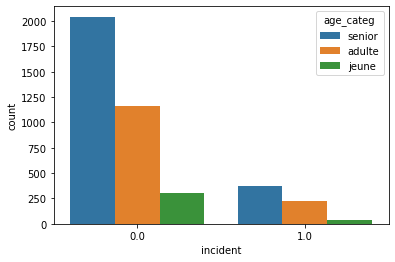

In [16]:
print('Nombre de jeunes (âge inférieure ou égale à 40 ans) =',str(len(df[df['age_categ']=='jeune'])))
print('Nombre des adultes (entre 41 et 65 ans) =',str(len(df[df['age_categ']=='adulte'])))
print('Nombre des séniors (65 ans et plus) =',str(len(df[df['age_categ']=='senior'])))
plt.figure()
sns.countplot(x = 'incident', hue = 'age_categ', data = df)

### On constate que les consommateurs de la tranche d’âge de plus de 65 ans (senior) sont majoritaires, suivis de ceux de la tranche des consommateurs entre 41 et 65 ans (adulte), ensuite les jeunes de 0 à 40 ans au plus.

### Nous allons séparer les variables numériques en variables numériques continues et discrètes pour des besoins de visualisation ###

In [17]:
var_num_cont = [v for v in df if df[v].nunique()>13] #13 parceque vu le nombre d'occurence unique vue précédent, le nombre pour la durée atteint 13
print(var_num_cont)
var_num_dis= [v for v in df if v not in var_num_cont] #toute variable dont le nombre d'occurence unique est inférieur ou égale à 13
print(var_num_dis)

['revenu', 'depnaiss', 'datenaiss', 'montcred', 'ancienn']
['duree', 'situfam', 'cb', 'incident', 'age_categ']


### Affichage graphique des variables numériques discrètes ###

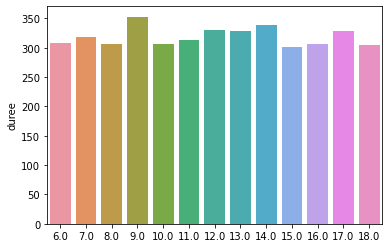

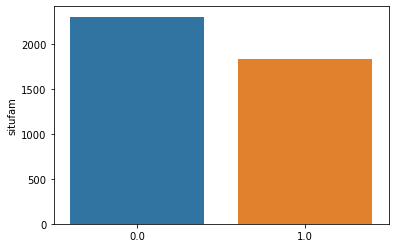

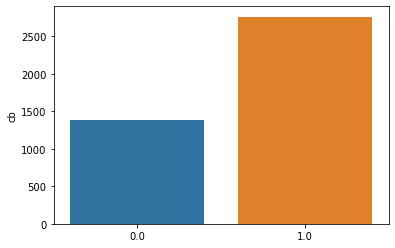

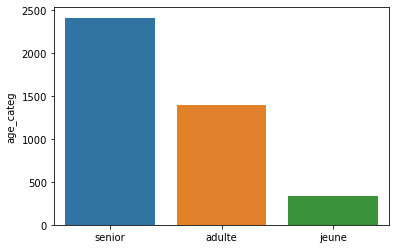

In [18]:
for v in var_num_dis:
    if v!='incident':
        plt.figure()
        sns.barplot(x=df[v].value_counts().index, y = df[v].value_counts()) 

### Cette analyse univariée des variables numériques discrètes nous montre que les consommateurs en possession d'une carte bancaire sont les plus nombreux que ceux là qui n'en ont pas. Et les célibataires sont aussi nombreux par rapport à ceux en couple. La durée du crédit reste peu variante et moins signifiante, cependant il y'a plus de consommateurs qui ont une durée de crédit de 9 mois.

### Affichage graphique des variables numériques continues ###

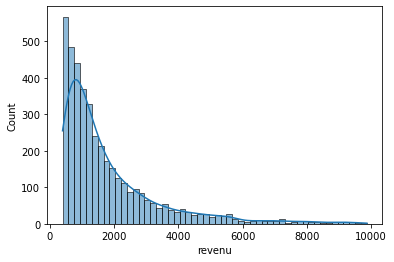

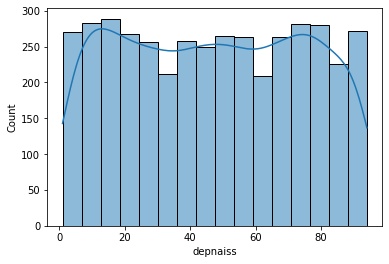

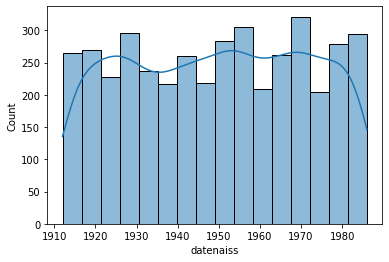

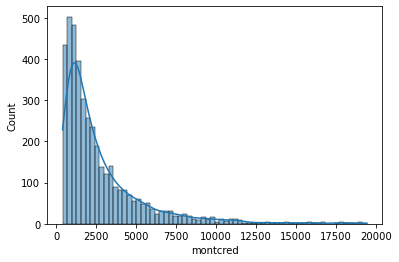

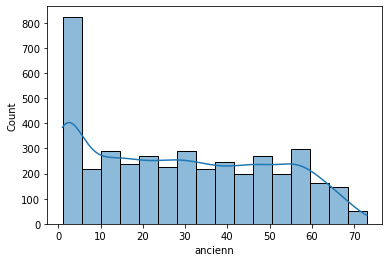

In [19]:
for v in var_num_cont:
    plt.figure()
    sns.histplot(df[v], kde = True)

### L'analyse univariée des variables numériques continues nous donnent d'informations intéressantes sur les variables revenu et montcred avec de variations significatives indiquées par une forte concentration de population de consommateurs à faible montant et moins de population quand le montant augmente. Par contre les autres variables témoignent de peu d'information signifiant à part la variable ancienn qui montre une forte concentration de consommateurs entre 0 à 5 ans, et varie peu pour le reste.

### 5. Analyse bivariée des variables ###

### Affichage graphique des variables discrètes ###

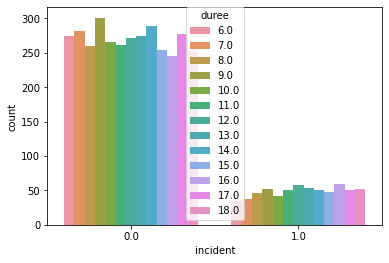

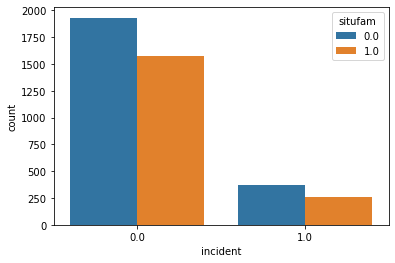

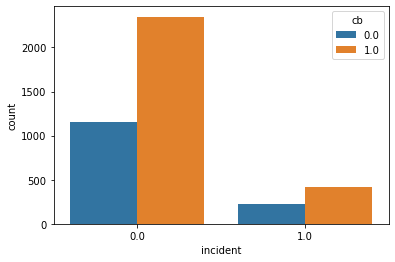

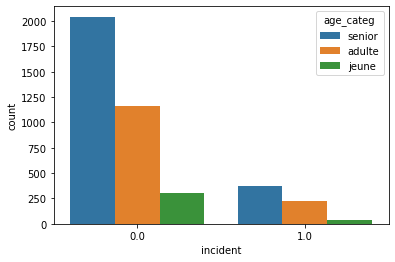

In [20]:
for v in var_num_dis:
    if v!='incident':
        plt.figure()
        sns.countplot(x = 'incident', hue = v, data = df)

### Affichage graphique des variables continues ###

In [21]:
#Graphique de distribution des variables indépendantes par rapport à la variable dépendante
for d in enumerate(var_num_cont):
    incident_0 = df.loc[df["incident"] == 0][d[1]].values.tolist()
    incident_1 = df.loc[df["incident"] == 1][d[1]].values.tolist()
    incident = df[d[1]].values.tolist()
    #Premier plot
    trace_0 = go.Histogram(
        x=incident_0,
        histnorm='probability',
        name="Pas d\'incident"
    )
    #Second plot
    trace_1 = go.Histogram(
        x=incident_1,
        histnorm='probability',
        name="Avec incident"
    )
    #Troisième plot
    trace_2 = go.Histogram(
        x=incident,
        histnorm='probability',
        name="Total "+d[1]
    )

    #Créer la grille
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Pas d\'incident','Avec incident', 'Distribution Générale'))

    #Placer les figures
    fig.append_trace(trace_0, 1, 1)
    fig.append_trace(trace_1, 1, 2)
    fig.append_trace(trace_2, 2, 1)

    fig['layout'].update(showlegend=True, title='Distribution par rapport à la variable '+d[1], bargap=0.05)
    py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')          

### La distribution faite à la variable montcred en général, nous montre une forte population avec moins de montant du crédit sans incident et une faible population pour les montants élévés, nous observons la même chose pour les montants de crédit avec incident, pareil pour la distribution générale. Le même phénomène expliqué avec montcred peut être expliqué avec revenu. ###

### 6. Etude de la correlation entre les variables

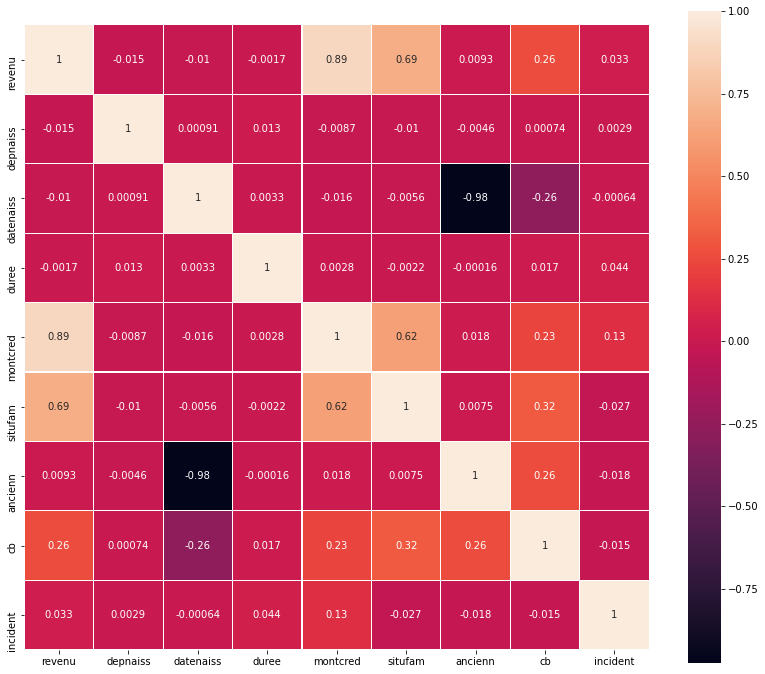

In [22]:
del df['age_categ'] #On enlève la nouvelle variable categorie d'âge ajoutée, peut nécessaire pour la modélisation
plt.figure(figsize=(14,12))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

### 7. Pré-traitement des données

In [24]:
#Librairies pour la modélisation
from sklearn import metrics  
from sklearn.model_selection import train_test_split, KFold, cross_val_score # pour la séparation des données
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, fbeta_score, roc_auc_score,roc_curve, auc # Pour évaluer notre model
from sklearn.model_selection import GridSearchCV, learning_curve
# Les models d'algorithmes pour la comparaison
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
warnings.filterwarnings('ignore') #masquer les warnings

In [25]:
# Etat aléatoire
import random
seed = random.seed(200)
#Créeation des varaibles indépendantes X et la variable dépendate Y
X = df.drop('incident', 1).values
y = df["incident"].values

# Diviser X et Y en données d'entrainnement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=seed)

LR (Recall Cross Validation) : 0.010232 (0.016285)
[[889   1]
 [147   0]]
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92       890
         1.0       0.00      0.00      0.00       147

    accuracy                           0.86      1037
   macro avg       0.43      0.50      0.46      1037
weighted avg       0.74      0.86      0.79      1037

AUC: 0.499438202247191
-------------------------------
LDA (Recall Cross Validation) : 0.061850 (0.025787)
[[881   9]
 [140   7]]
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       890
         1.0       0.44      0.05      0.09       147

    accuracy                           0.86      1037
   macro avg       0.65      0.52      0.50      1037
weighted avg       0.80      0.86      0.80      1037

AUC: 0.5187533440342429
-------------------------------
KNN (Recall Cross Validation) : 0.056818 (0.030212)
[[848  42]
 [134  13]]
           

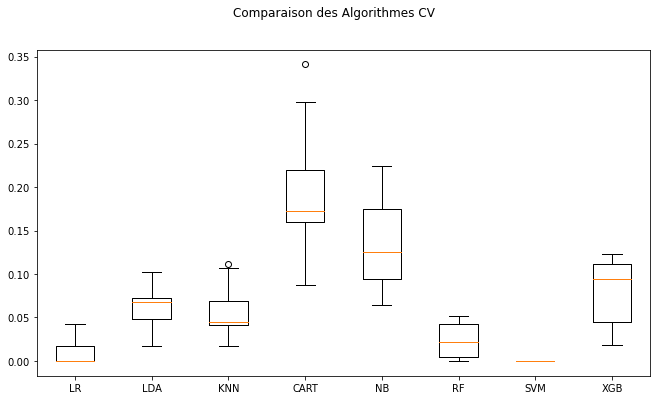

In [43]:

# Préparation des modèles 
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))
scoring = 'recall' #Mésure de la précision chosie
def pre_evaluation_model(x_train_set, y_train_set):
        # On evalue chaque modèle dans la boucle
        results = []
        names = []
        #Nous pouvons effectuer une cross validation sur les données
        for name, model in models:
                kfold = KFold(n_splits=10, random_state=seed) #découpage aléatoire des données en 10 
                cv_results = cross_val_score(model, x_train_set, y_train_set, cv=kfold, scoring=scoring) #resultats de la cross validation
                results.append(cv_results)
                names.append(name)
                msg = "%s (Recall Cross Validation) : %f (%f)" % (name, cv_results.mean(), cv_results.std()) #Affichage des resultats avec le nom du modèle, la moyennes des cross evaluées et l'écart-type
                print(msg)
                model.fit(x_train_set,y_train_set)
                y_pred_model=model.predict(X_test)
                print(confusion_matrix(y_test, y_pred_model))
                print(classification_report(y_test, y_pred_model))
                print("AUC:",roc_auc_score(y_test, y_pred_model))
                print("-------------------------------")
              
                
        # Faire un boxplot des algorithmes pour la comparaison
        fig = plt.figure(figsize=(11,6))
        fig.suptitle('Comparaison des Algorithmes CV')
        ax = fig.add_subplot(111)
        plt.boxplot(results)
        ax.set_xticklabels(names)
        plt.show()

pre_evaluation_model(X_train, y_train)

### Tous les modèles ont affiché une valeur recall inferieure à 0.50. La prédiction des consommateurs avec incidences reste à souhaiter pour tous les modèles evalués.
### Nous allons faire un rechantillonnage sur les données pour augmenter une grande prédiction sur la classe 1 c'est à à dire la classe des consommateurs avec incident. Tout en faisant de sorte qu'il ait moins de mauvaise prédicition pour la classe 0 (classe des consommateur sans incident)

### 8. Re-echantillonage des données déséquilibrées ###

In [27]:
#Besoin d'installer ces deux librairie: la première est utilisée pour re-échantillonner les données en tenant compte de la classe minoritaire
#La deuxième pour palier à une erreur qui s'est produite après l'installation de la première.
!pip install -U imbalanced-learn
!pip install delayed

Requirement already up-to-date: imbalanced-learn in d:\anacondapython\lib\site-packages (0.8.1)


In [28]:
from imblearn.combine import SMOTETomek #importation de la bibliothèque

In [29]:
#On ré-affecte les valeurs de X et y
X = df.drop('incident', 1).values
y = df["incident"].values
smt = SMOTETomek() # permet de sur échantillonner la classe 1 (minoritaire) et sous échantillonner la classe 0
X_smt, y_smt = smt.fit_resample(X, y) #On appliquqe l'echantillonnage

# Diviser X_smt et y_smt en données d'entrainnement et de test
X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X_smt, y_smt, test_size = 0.25, random_state=seed)

In [30]:
#Un aperçu de la longueur du nouvel échantillon de données à entrainner contre l'ancienne
print(len(X_train_smt),len(y_train_smt), len(X_train), len(y_train))
print(len(X_test_smt), len(y_test_smt), len(X_test), len(y_test))

4938 4938 3108 3108
1646 1646 1037 1037


LR (Recall Cross Validation) : 0.707285 (0.030380)
[[490 400]
 [ 38 109]]
              precision    recall  f1-score   support

         0.0       0.93      0.55      0.69       890
         1.0       0.21      0.74      0.33       147

    accuracy                           0.58      1037
   macro avg       0.57      0.65      0.51      1037
weighted avg       0.83      0.58      0.64      1037

AUC: 0.6460291981961325
-------------------------------
LDA (Recall Cross Validation) : 0.705839 (0.014901)
[[530 360]
 [ 43 104]]
              precision    recall  f1-score   support

         0.0       0.92      0.60      0.72       890
         1.0       0.22      0.71      0.34       147

    accuracy                           0.61      1037
   macro avg       0.57      0.65      0.53      1037
weighted avg       0.83      0.61      0.67      1037

AUC: 0.6514943055874035
-------------------------------
KNN (Recall Cross Validation) : 0.886169 (0.020017)
[[627 263]
 [ 16 131]]
          

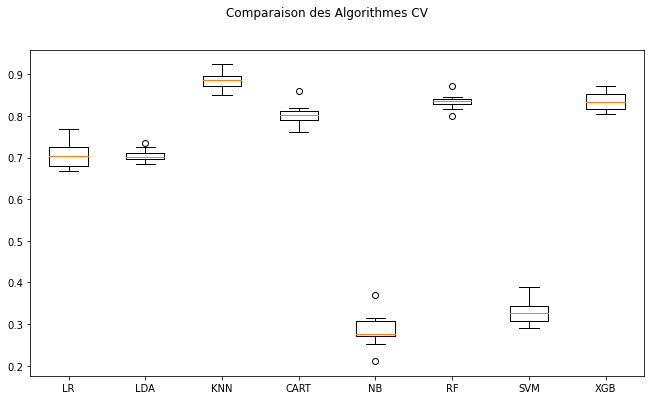

In [31]:
#On révalue de nouveau les modèle avec le nouvel échantillon
pre_evaluation_model(X_train_smt,y_train_smt)

### Après l'analyse des évaluations faite avec le nouvel échantillon, nous nous apercevons que les modèles Radom Forest et SVM ont fait de bons scores de prédiction par rapport aux autres. L'évaluation est faite principalement sur les métriques recall, precision et AUC, et aussi avec la matrice de confusion. SVM fait la meilleur prédiction de la classe 0 (sans incident) et reste legèrement derrière Radom Forest concernant la prédiction de la classe 0 (avec incident). ###

### Nous allons faire dans la suite le réglage de quelques hyper paramètres pour améliorer les scores des modèles choisis en passant par une cross validation.

### 9. Modélisation ###

### Random Forest ###

In [32]:
#Reglage des hyper parametres
param_grid = {'bootstrap': [True],
            'max_depth': [80, 90, 100],
            'n_estimators':[500,800,1500]
        }

#Créer le classificateur
model = RandomForestClassifier()

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=4)
grid_search.fit(X_train_smt, y_train_smt)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END bootstrap=True, max_depth=80, n_estimators=500;, score=0.917 total time=   3.6s
[CV 2/5] END bootstrap=True, max_depth=80, n_estimators=500;, score=0.939 total time=   3.5s
[CV 3/5] END bootstrap=True, max_depth=80, n_estimators=500;, score=0.931 total time=   3.2s
[CV 4/5] END bootstrap=True, max_depth=80, n_estimators=500;, score=0.926 total time=   3.1s
[CV 5/5] END bootstrap=True, max_depth=80, n_estimators=500;, score=0.922 total time=   3.2s
[CV 1/5] END bootstrap=True, max_depth=80, n_estimators=800;, score=0.917 total time=   4.9s
[CV 2/5] END bootstrap=True, max_depth=80, n_estimators=800;, score=0.940 total time=   5.0s
[CV 3/5] END bootstrap=True, max_depth=80, n_estimators=800;, score=0.929 total time=   5.3s
[CV 4/5] END bootstrap=True, max_depth=80, n_estimators=800;, score=0.925 total time=   5.0s
[CV 5/5] END bootstrap=True, max_depth=80, n_estimators=800;, score=0.925 total time=   5.0s
[CV 1/5] E

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100],
                         'n_estimators': [500, 800, 1500]},
             scoring='roc_auc', verbose=4)

In [33]:
print(grid_search.best_score_)
print(grid_search.best_params_)
bootstrap=grid_search.best_params_['bootstrap']
max_depth=grid_search.best_params_['max_depth']
n_estimators=grid_search.best_params_['n_estimators']

0.9284572492142187
{'bootstrap': True, 'max_depth': 90, 'n_estimators': 800}


In [34]:
#Construire le modèle avec les meilleurs paramètres
rf = RandomForestClassifier(bootstrap=bootstrap, max_depth= max_depth, n_estimators=n_estimators)

#Entrainné avec les meilleurs paramètres
result=rf.fit(X_train_smt, y_train_smt)

### Fonction de calcul des performances du modèle

In [35]:
def model_evaluation(y_test, y_pred_model):
    
    #model.fit(X_train, y_train)
    #ypred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred_model))
    print(classification_report(y_test, y_pred_model))
    print("AUC:",roc_auc_score(y_test, y_pred_model))
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_model)
    # Plot Courbe ROC
    plt.figure(figsize=(8,6))
    plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline')
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_model):.2f}')
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title('Courbe ROC')
    plt.legend()
    plt.show()
    #metrics.plot_roc_curve(name_abr, X_test, y_test)

[[849  41]
 [ 21 126]]
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96       890
         1.0       0.75      0.86      0.80       147

    accuracy                           0.94      1037
   macro avg       0.87      0.91      0.88      1037
weighted avg       0.94      0.94      0.94      1037

AUC: 0.90553772070626


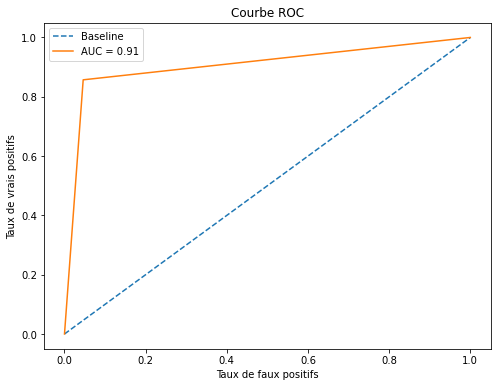

In [36]:
#Tester le model
#Prédire en utilisant le modèle
y_pred_rf= rf.predict(X_test)
#y_pred_smt_rf= rf.predict(X_test_smt)
#y_pred_lr_prob =xgb.predict_proba(X_test)[:, 1]

# Vérification des resultats obtenus
model_evaluation(y_test,y_pred_rf)
#model_evaluation(y_test_smt, y_pred_smt_rf)

### SVM (Support Vector Machines) ###

In [37]:
#Reglage des hyper parametres
param_grid =[{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], #mon hôte ne cesse de tourner quand j'utilise linear comme Kernel
                     'C': [1, 10, 100, 1000]}]

#Créer le classificateur
model = SVC(random_state=seed)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=4)
grid_search.fit(X_train_smt, y_train_smt)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.878 total time=   1.6s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.888 total time=   1.8s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.884 total time=   1.7s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.898 total time=   1.6s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.887 total time=   1.6s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.758 total time=   1.3s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.782 total time=   1.3s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.781 total time=   1.3s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.785 total time=   1.4s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.784 total time=   1.3s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.892 total time=   1.9s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='roc_auc', verbose=4)

In [38]:
print(grid_search.best_score_)
print(grid_search.best_params_)
c=grid_search.best_params_['C']
kernel=grid_search.best_params_['kernel']
gamma=grid_search.best_params_['gamma']

0.9021128147228327
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [39]:
#Construire le modèle avec les meilleurs paramètres
svm = SVC(C=c, gamma= gamma,kernel=kernel, random_state=seed, probability=True)

#Entrainné avec les meilleurs paramètres
svm.fit(X_train_smt, y_train_smt)

SVC(C=10, gamma=0.001, probability=True)

[[816  74]
 [  4 143]]
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.95       890
         1.0       0.66      0.97      0.79       147

    accuracy                           0.92      1037
   macro avg       0.83      0.94      0.87      1037
weighted avg       0.95      0.92      0.93      1037

AUC: 0.944821524115264


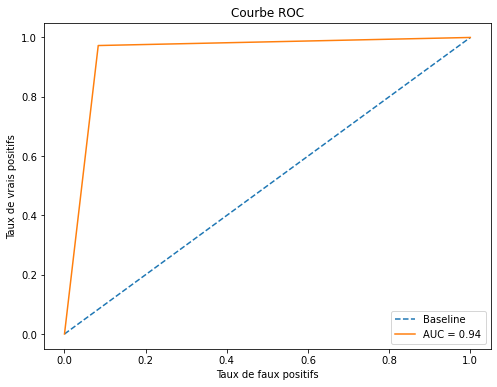

In [40]:
#Tester le model
#Prédire en utilisant le modèle
y_pred_svm = svm.predict(X_test)
#y_pred_stm_svm = svm.predict(X_test_smt)
#y_pred_svm_prob =svm.predict_proba(X_test)[:, 1]

# Vérification des resultats
model_evaluation(y_test,y_pred_svm)
#model_evaluation(y_test_smt,y_pred_stm_svm)

### D'après les derniers résultats obtenus, nous avons obtenu de meilleurs scores avec le SVM avec la meilleure prédiction de la classe des consommateurs avec incident. 
### Bien prédire cette classe est un avantage pour la banque de ne pas perdre de bénéfice ou de l'argent, prédire mal aussi la classe 0 (classe opposée) peut indiquer à tort un bon client ou consommateur. C'est d'ailleurs pourquoi les critères de sélection des modèles étaient basés sur les métriques precision et recall, car ces derniers faisaient effet sur la performance au modèle de prédire bien ou à tort une classe données, et le SVM est bon candidat suivi de Random Forest.
